In [1]:
#!python -m pip install nidaqmx
import threading
import random
import time
from queue import Queue, Empty
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
import re
import requests
import json
from Plater import Plater , deviceChannels, RunIV , Plate , PlatingLoop
from PlaterData import ConductanceDatabaseObject,Grapher_Send
from datetime import datetime
import time
import sys


plater=Plater(10000) 

Thresh Current:10nA bias:0.2V


In [2]:
wafer='W049'
chip ='B5'

platingChannels = [x for x in deviceChannels]
platingChannels 


#a procedure for setting the parameters for the plating.  You can set parameters for each channel or just one for whole chip.
def setParameters(channel):
    if channel.startswith('N'):
        bothElectrodes=True
        threshold_nA=10
        bias_V=1.2
        shortedThreshold_nS=8
        maxTimeS=8
        settleTime_S=1
        quickPulse =True
    elif channel.startswith('E'):
        bothElectrodes=True
        threshold_nA=10
        bias_V=1.2
        shortedThreshold_nS=8
        maxTimeS=8
        settleTime_S=1
        quickPulse =True
    elif channel.startswith('S'):
        bothElectrodes=True
        threshold_nA=10
        bias_V=.9
        shortedThreshold_nS=8
        maxTimeS=8
        settleTime_S=1
        quickPulse =True
    elif channel.startswith('W'):
        bothElectrodes=False
        threshold_nA=10
        bias_V=.9
        shortedThreshold_nS=8
        maxTimeS=120
        settleTime_S=1
        quickPulse =True

    
    infos={ 
            #switch from electrode to electrode during plating (maxTimeS sets swithcing frequecy)
            "bothElectrodes":bothElectrodes,
            #current to stop applying a voltage
            "threshold_nA":threshold_nA,
            #if the current is higher than this, the electrode is shorted and do not plate
            "shortedThreshold_nS":shortedThreshold_nS,
            #maximum time to try to get a threshold event per electrode
            "maxTimeS":maxTimeS,
            #how long after the ramp to set the threshold to threshold_nA
            "settleTime_S":settleTime_S,
            #run a quick pulse before plating to condition the electrode
            "quickPulse":quickPulse,
             #maximum time to try to get a threshold event
            "maxTime_Min":10,
            #after plating IV check quit if the current is higher than this
            'finishThreshold_nA':4,
            #max number of times the program will run an IV, check against finishThreshold_nA and repeat the plating
            'platingAttempts':10,
            #max number of times the program will switch the electrode and do a CV against the threshold_nA over maxTimeS
            'attemptsBeforeIV':10,
            #if finishThreshold_nA is not reached, try again?
            'redoAfterIV':True,
            #plating bias
            "bias_V":bias_V,
            
            
            #not really tested yet, dont use pulsing
            "pulsed":False,
             #reporting for server
            "Conductance":0,
            "Capacitance":0,
            "Wafer":wafer,
            "Chip":chip,
            "Device":channel,
            "Stage":stage,
            "source":"Plater",
            "dataFolder":f'//BIOD1633/Data/Plater/{wafer}/{chip}',
            "timestamp":str( datetime.now()),
            "bias":100,
            }    
    return infos 

conductanceDatabase=ConductanceDatabaseObject(wafer,chip) 
 
repeatChannels=[]


Found existing conductance database


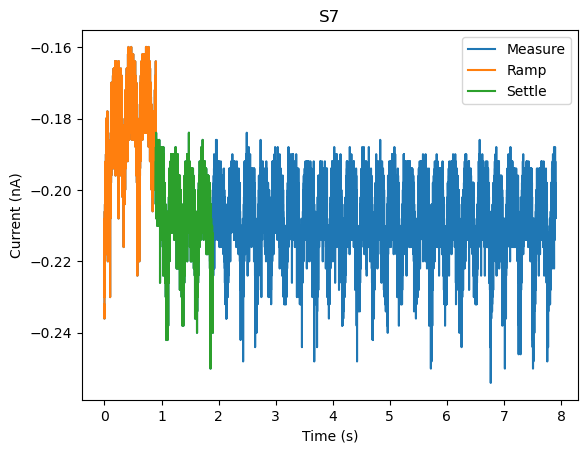

Iteration 0


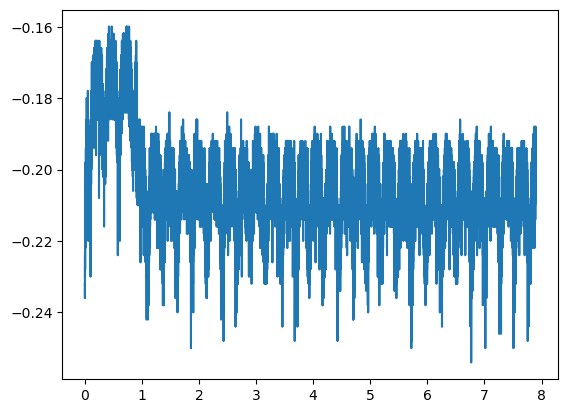

Thresh Current:200nA bias:4.0V
Thresh Current:200nA bias:4.0V


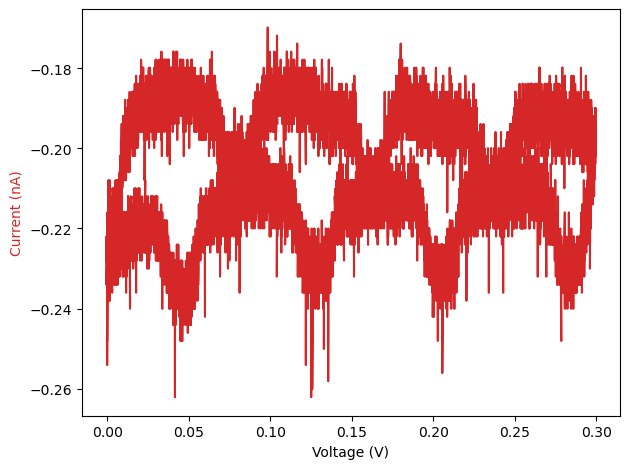

0.02805696370858786 nS
<Response [200]>
S7
attempt 8
S8


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


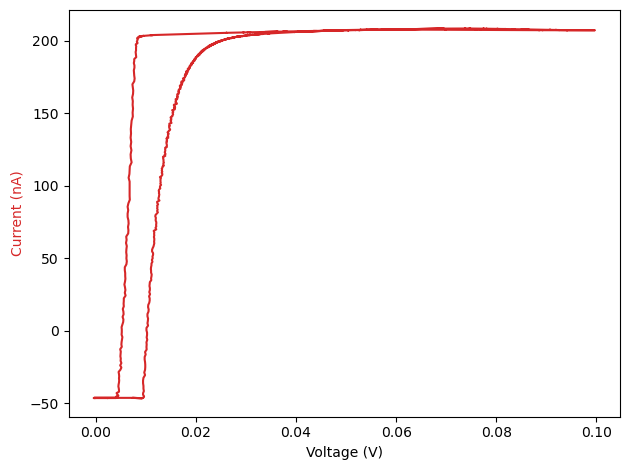

24153.629193431254 nS
<Response [200]>
ShortedS8
Overtimed Channels
['S7']


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [6]:
#########################################  Plating loop ##################################
stage ='Plating'

PlatingLoop(stage, plater, setParameters,platingChannels,repeatChannels,conductanceDatabase)
print('Overtimed Channels')        
print(repeatChannels)        

W1
Thresh Current:200nA bias:4.0V


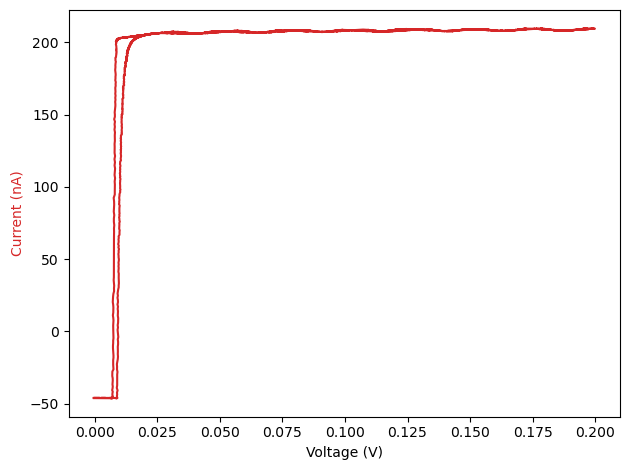

46086.44370574252 nS
<Response [200]>
W2


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


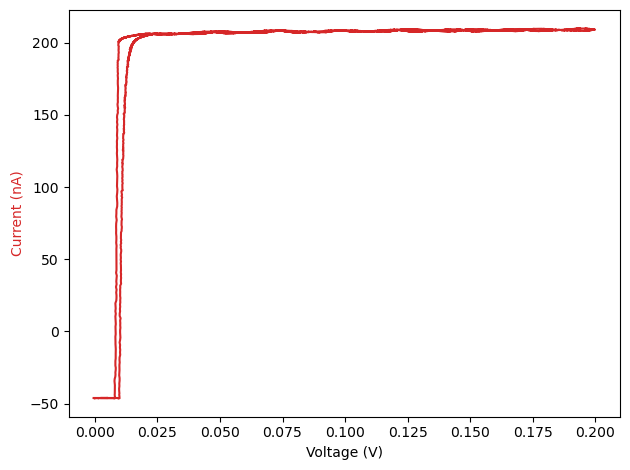

41797.73940442276 nS
<Response [200]>
W3


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


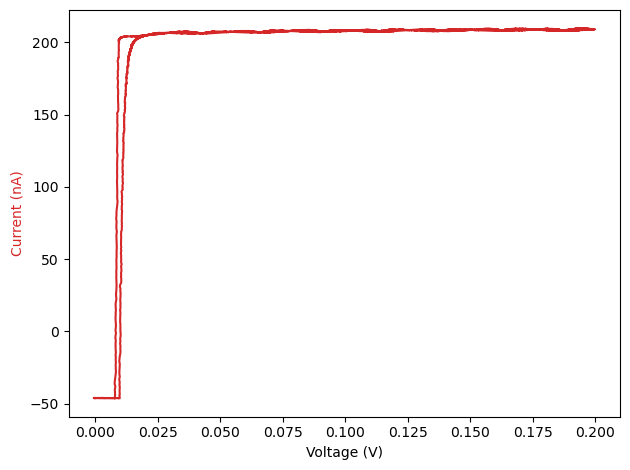

41519.39565936657 nS
<Response [200]>
W4


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


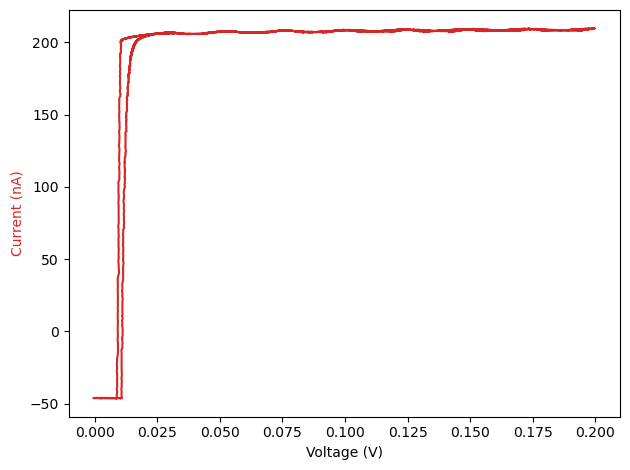

37628.348774042795 nS
<Response [200]>
W5


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


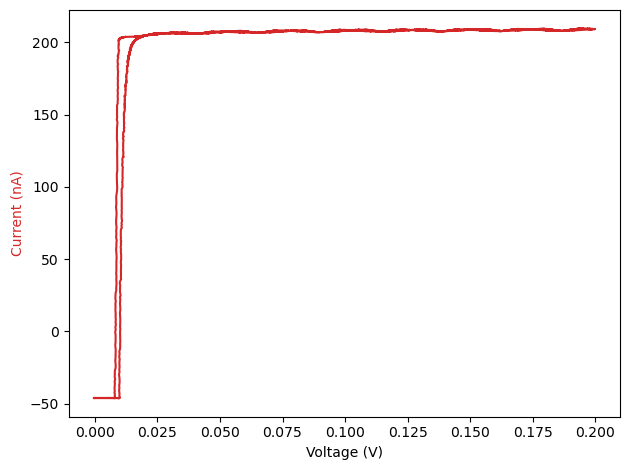

41686.026517653634 nS
<Response [200]>
W6


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


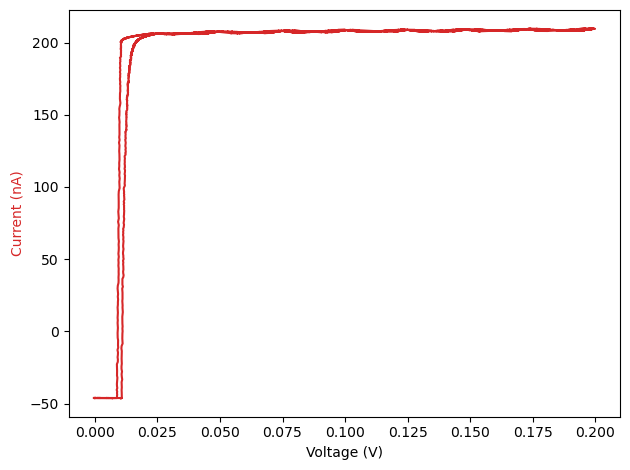

37800.87631932821 nS
<Response [200]>
W7


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


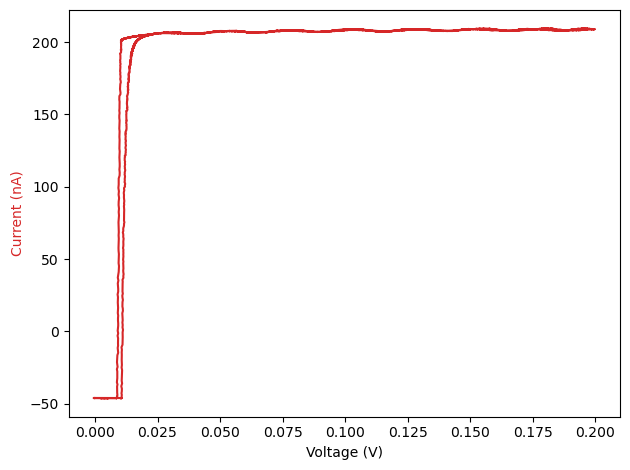

37641.34442055839 nS
<Response [200]>
W8


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


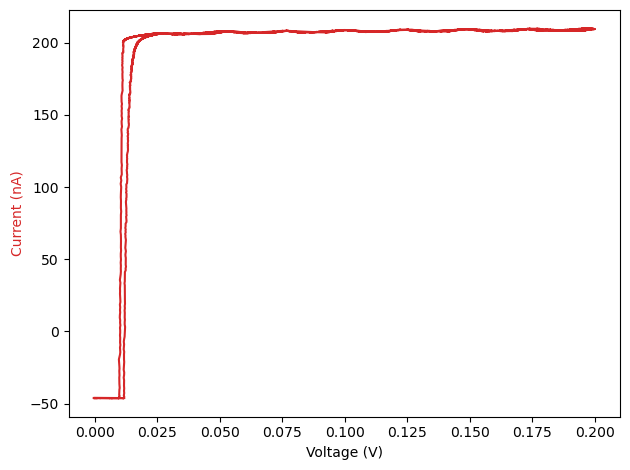

34352.943478287314 nS
<Response [200]>
N1


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


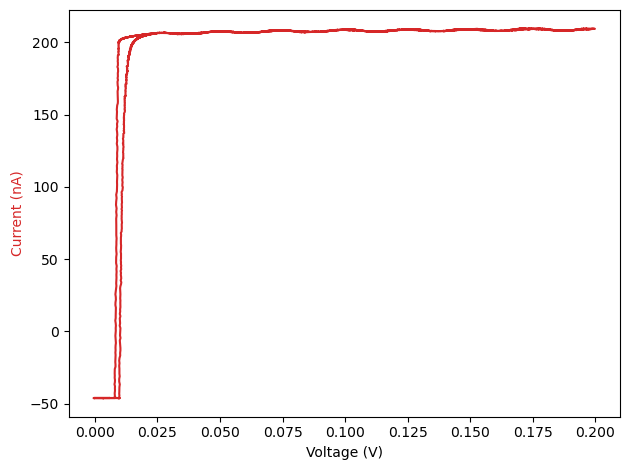

41446.01814145435 nS
<Response [200]>
N2


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


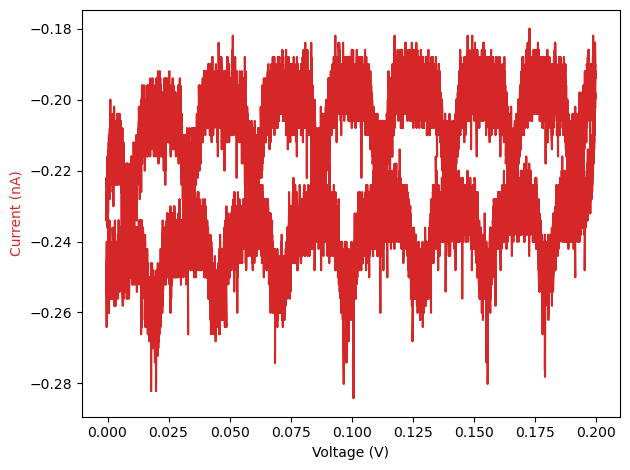

-0.0070202099456623725 nS
<Response [200]>
N3


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


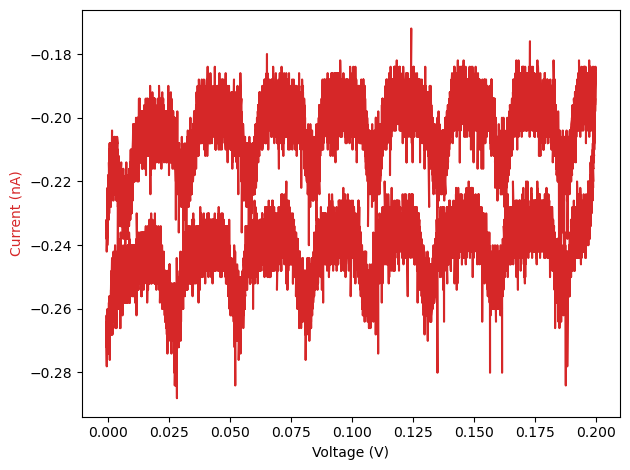

0.018205988762036215 nS
<Response [200]>
N4


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


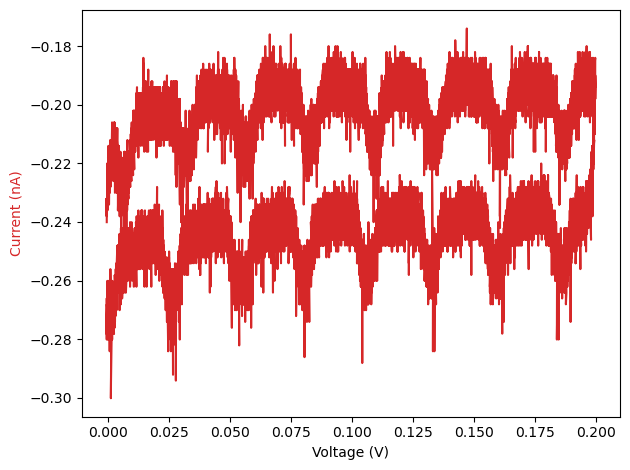

0.025185927311626256 nS
<Response [200]>
N5


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


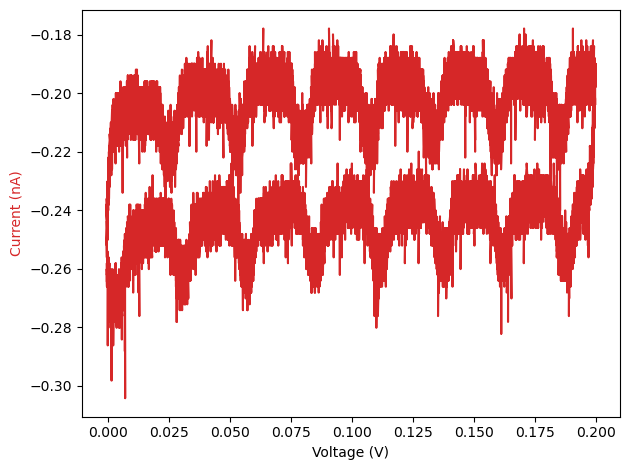

0.03415895234303942 nS
<Response [200]>
N6


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


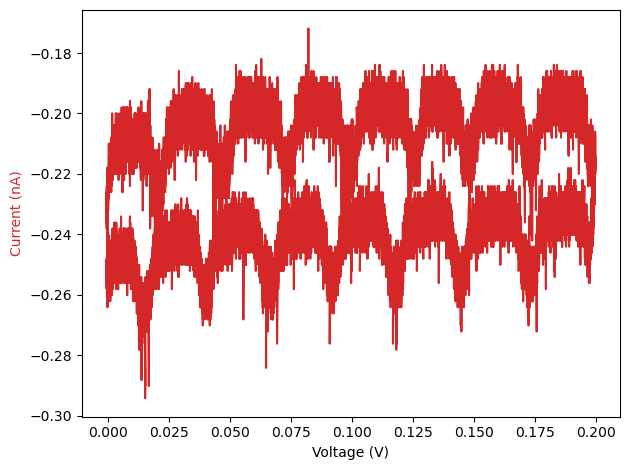

-0.0016484393000564142 nS
<Response [200]>
N7


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


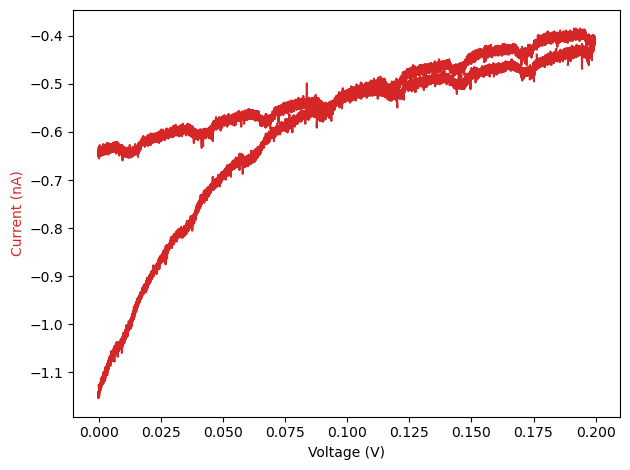

1.2904675937734587 nS
<Response [200]>
N8


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


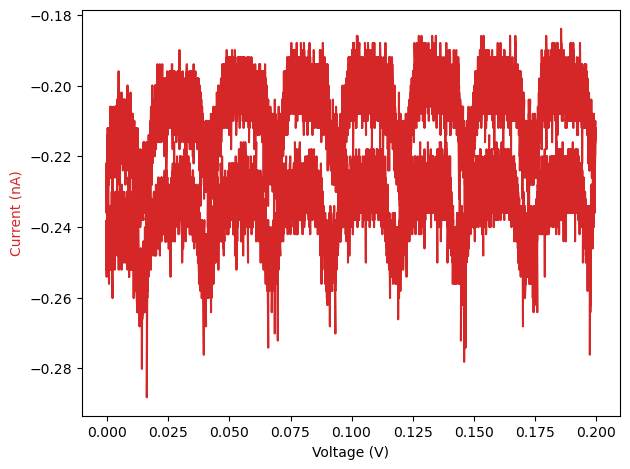

-0.01804105699682951 nS
<Response [200]>
E1


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


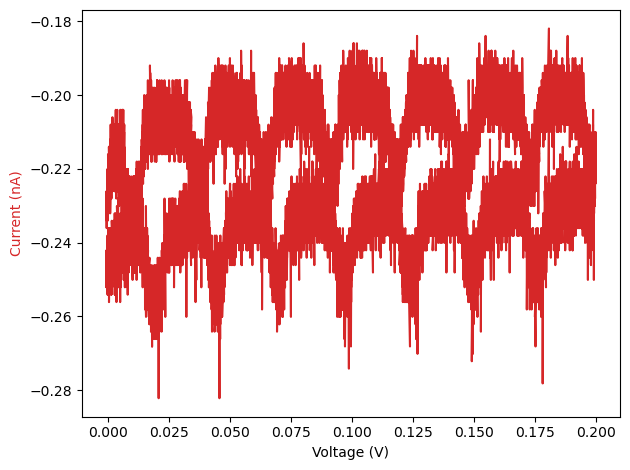

-0.02214534348334005 nS
<Response [200]>
E2


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


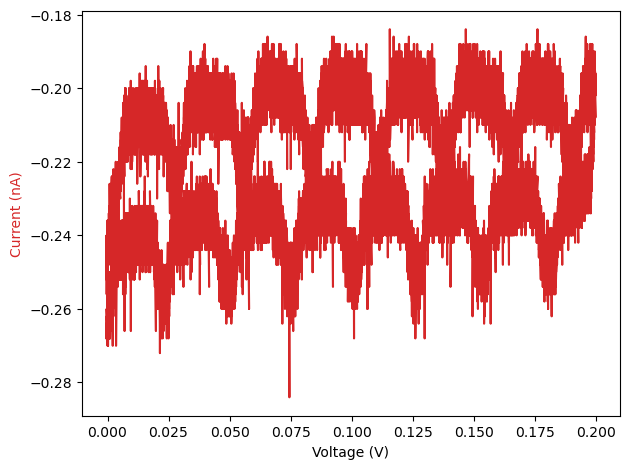

0.001881946764244053 nS
<Response [200]>
E3


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


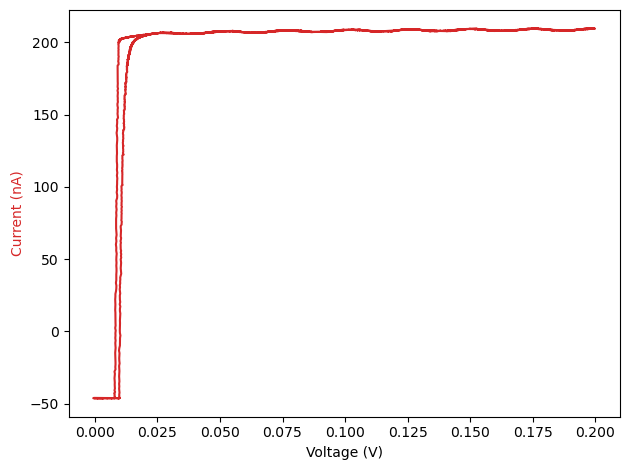

41723.6901466536 nS
<Response [200]>
E4


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


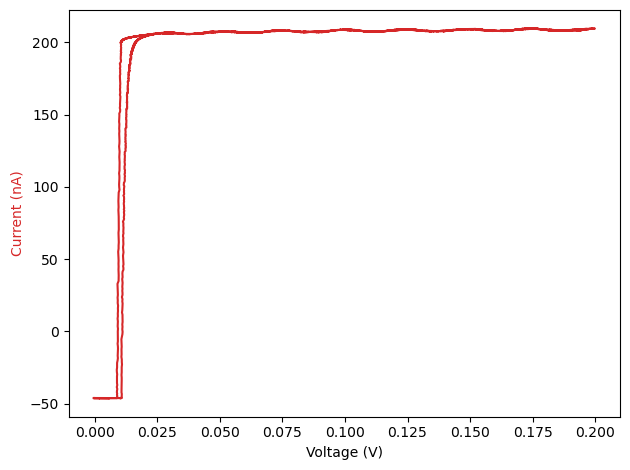

37930.61262210247 nS
<Response [200]>
E5


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


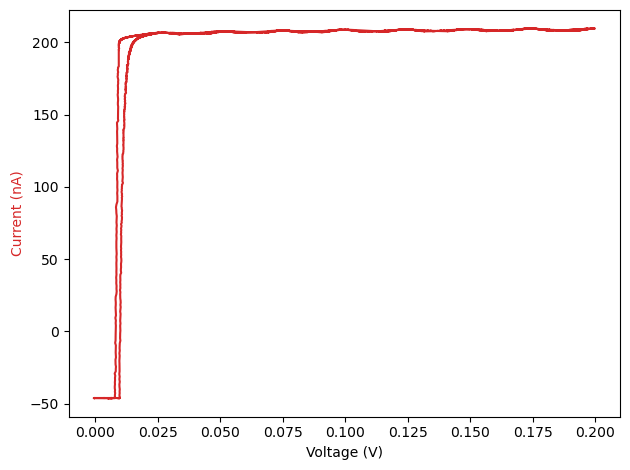

41766.56932914204 nS
<Response [200]>
E6


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


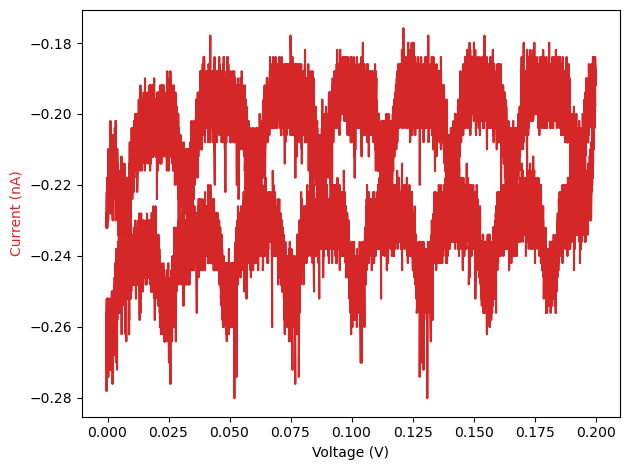

-0.008739374483062785 nS
<Response [200]>
E7


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


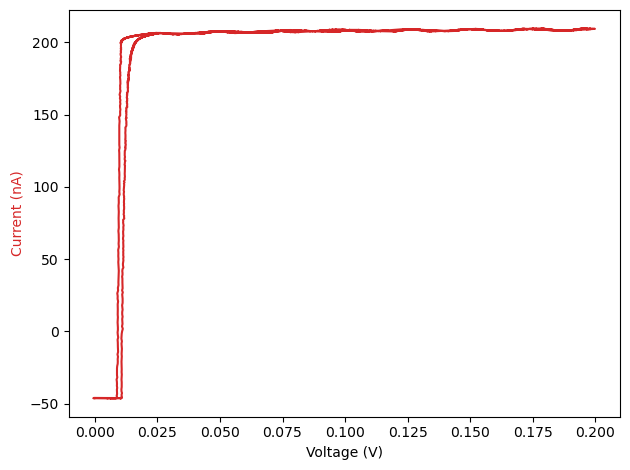

38060.25622246493 nS
<Response [200]>
E8


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


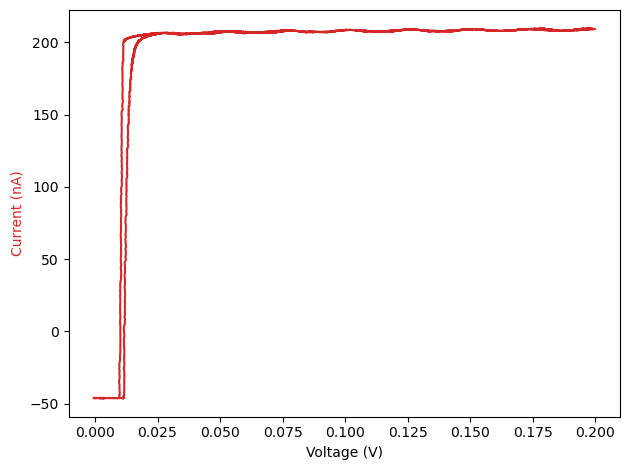

34523.96655076777 nS
<Response [200]>
S1


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


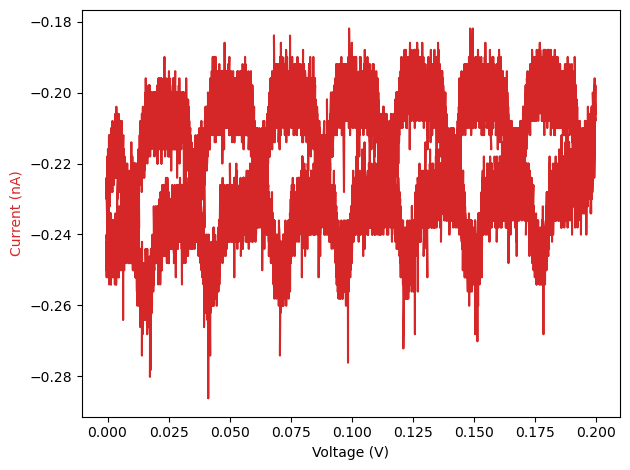

-0.023343121097982526 nS
<Response [200]>
S2


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


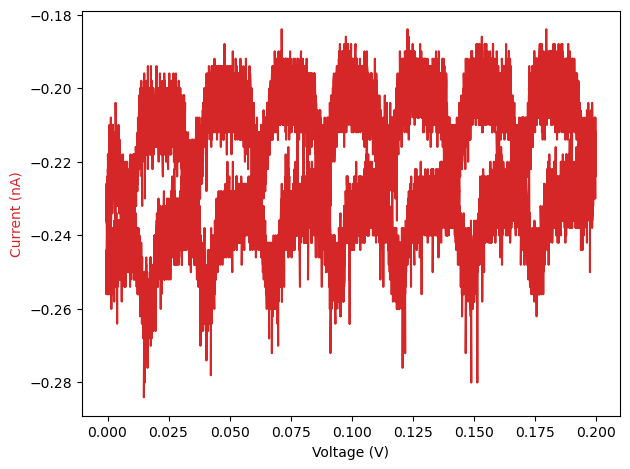

-0.01588481150225676 nS
<Response [200]>
S3


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


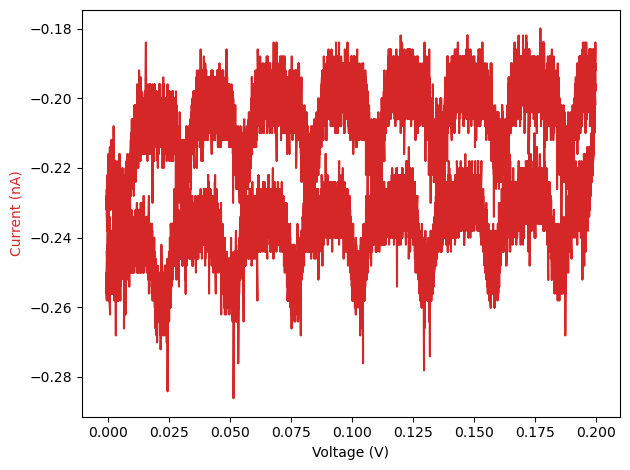

0.02587299964145728 nS
<Response [200]>
S4


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


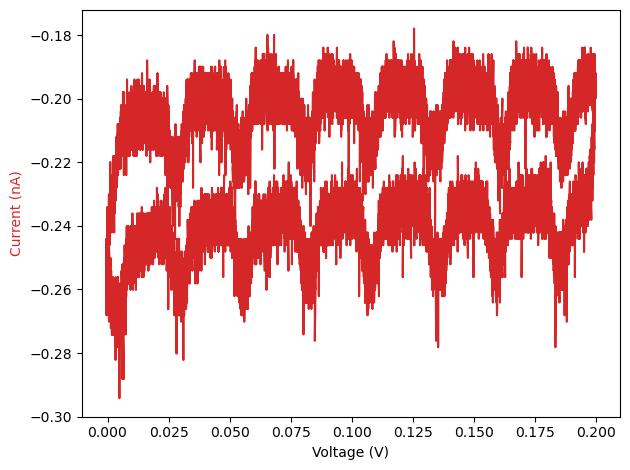

0.028036127932372788 nS
<Response [200]>
S5


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


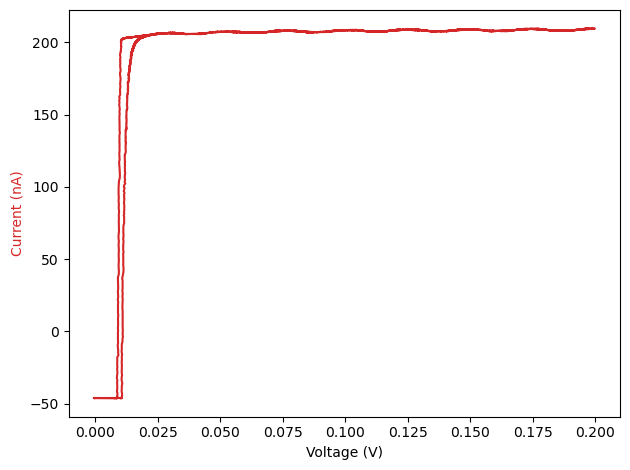

37822.62251212679 nS
<Response [200]>
S6


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


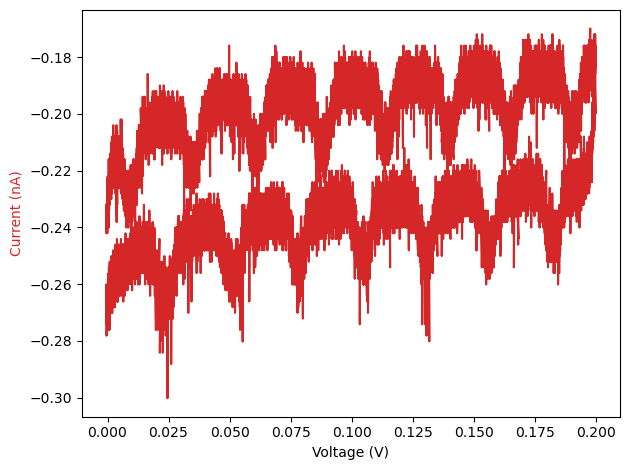

0.047796150304127996 nS
<Response [200]>
S7


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


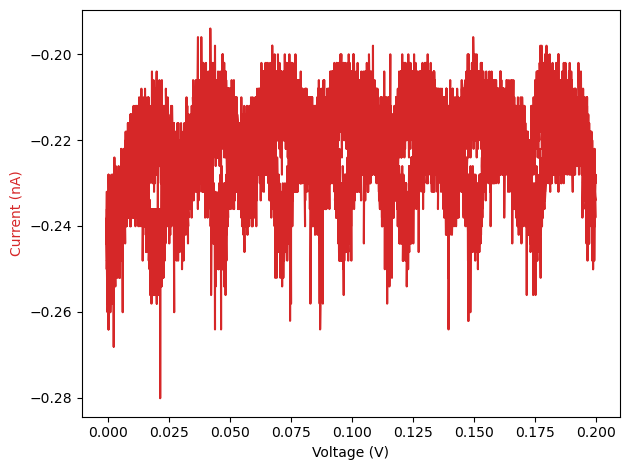

-0.01899798614793175 nS
<Response [200]>
S8


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Thresh Current:200nA bias:4.0V


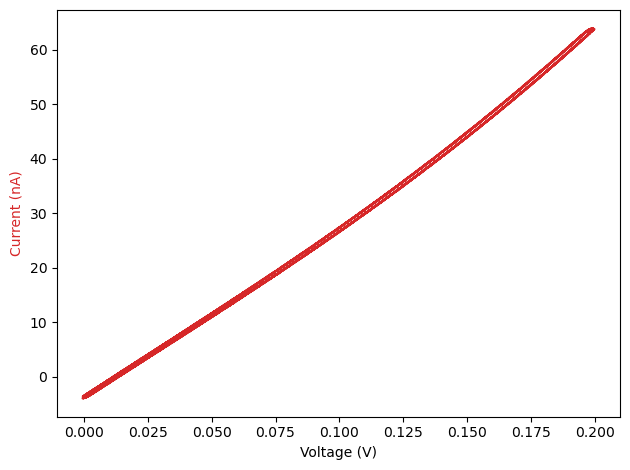

371.91851826000016 nS
<Response [200]>


C:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '10.212.27.176'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


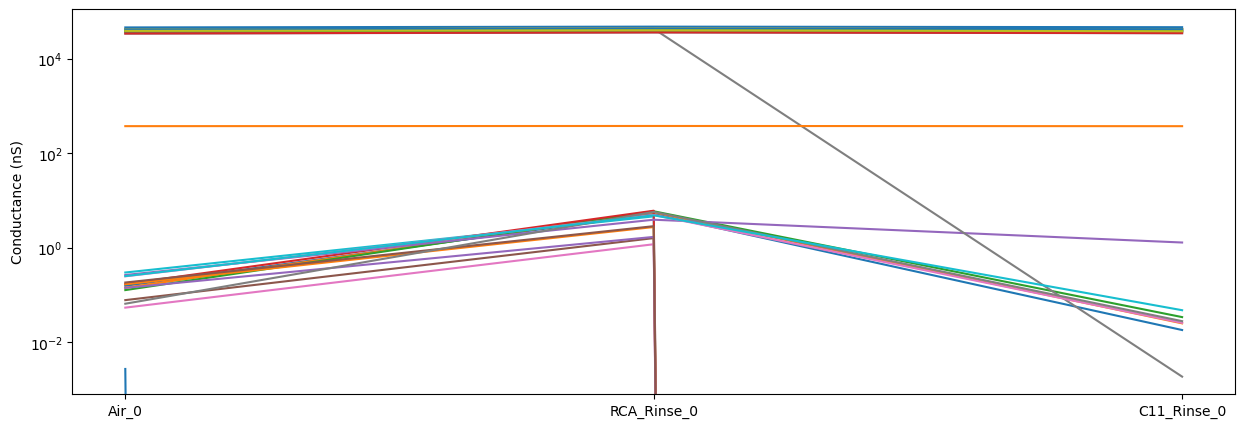

In [3]:
#########################################  Perform just the IV ##################################
numberScans=1

stage ='C11_Rinse' 
rtBias_mV = 200

topElectrode =True

for i in range(numberScans):
    for channel in plater.channels:
        print(channel)
        plater.setBias(0)
        plater.SelectChannel(channel)
        time.sleep(.5)
        infos = setParameters(channel)
        RunIV(infos, channel, stage+ '_'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=100, topElectrode=topElectrode)
 
    conductanceDatabase.PlotHistory()
    
            
    if numberScans>1:
        for j in range(60*3):
            time.sleep(20)

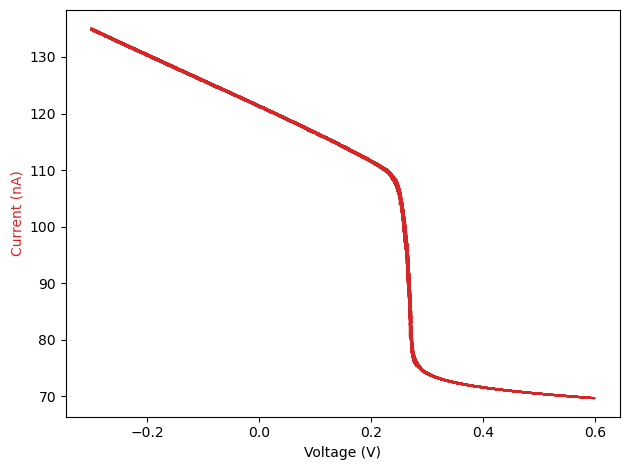

-12.23145470180511 nS


In [36]:

stage ='BSA_PB_S' 
infos = setParameters('N1')

conductance_nA, outBias,currents   = plater.runCV(startVoltage_V=0, minVoltage_V=-.3, maxVoltage_V=.6, slew_mV_s=100 , plot=True)
 

#!pip install pyvisa
numberScans=1

stage ='BSA_SD' 
rtBias_mV = 1400

topElectrode =True

side='N'
for c in range(1,8):
    channel=side+str(c)
    print(channel)
    plater.setBias(0)
    plater.SelectChannel(channel)
    time.sleep(.5)
    infos = setParameters(channel)
    RunIV(infos, channel, stage+ '_1'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=150, topElectrode=topElectrode)
    RunIV(infos, channel, stage+ '_2'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=150, topElectrode=topElectrode)
    RunIV(infos, channel, stage+ '_3'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=150, topElectrode=topElectrode)


rtBias_mV = 1200
side='S'
for c in range(1,8):
    channel=side+str(c)
    print(channel)
    plater.setBias(0)
    plater.SelectChannel(channel)
    time.sleep(.5)
    infos = setParameters(channel)
    RunIV(infos, channel, stage+ '_1'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=150, topElectrode=topElectrode)
    RunIV(infos, channel, stage+ '_2'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=150, topElectrode=topElectrode)
    RunIV(infos, channel, stage+ '_3'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=150, topElectrode=topElectrode)

    
    
rtBias_mV =900
side='E'
for c in range(1,8):
    channel=side+str(c)
    print(channel)
    plater.setBias(0)
    plater.SelectChannel(channel)
    time.sleep(.5)
    infos = setParameters(channel)
    RunIV(infos, channel, stage+ '_1'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=150, topElectrode=topElectrode)
    RunIV(infos, channel, stage+ '_2'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=150, topElectrode=topElectrode)
    RunIV(infos, channel, stage+ '_3'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=150, topElectrode=topElectrode)

    
rtBias_mV = 700
side='W'
for c in range(1,8):
    channel=side+str(c)
    print(channel)
    plater.setBias(0)
    plater.SelectChannel(channel)
    time.sleep(.5)
    infos = setParameters(channel)
    RunIV(infos, channel, stage+ '_1'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=150, topElectrode=topElectrode)
    RunIV(infos, channel, stage+ '_2'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=150, topElectrode=topElectrode)
    RunIV(infos, channel, stage+ '_4'+ str(i),  rtBias_mV, plater, conductanceDatabase, slew_mV_s=150, topElectrode=topElectrode)

        
    
    
conductanceDatabase.PlotHistory()
    
            


In [3]:
import pyvisa
import time
import numpy as np
import matplotlib.pyplot as plt
rm = pyvisa.ResourceManager()
print(rm.list_resources())

keithley = rm.open_resource("TCPIP0::129.219.2.85::5025::SOCKET")
print('\n Open Successful!')
keithley.read_termination = '\n'
keithley.write_termination = '\n'

code ="""
reset()
loadscript
    
    
    numCycles=2
    frequency=1
    limitI=10e-10

	local COMPLETE = "{COMPLETE}"
	-- Generate the source values
	local Vpp				= .2
	local sourceValues		= {} 
	local pointsPerCycle	= 7200 / frequency
	local numDataPoints		= pointsPerCycle * numCycles

	local res = {}
    for i = 1, numDataPoints do
        res[i] =math.abs( math.sin(i * 2 * math.pi / pointsPerCycle))
        sourceValues[i] = (Vpp * res[i])  
    end

	-- Configure the SMU ranges
	smua.reset()
	smua.source.settling		= smua.SETTLE_FAST_POLARITY
	smua.source.autorangev		= smua.AUTORANGE_OFF
	smua.source.autorangei		= smua.AUTORANGE_OFF
    smua.source.rangev			= math.abs( Vpp ) +.01
	smua.source.delay			= 0
	smua.source.limiti			= 1e-3

	smua.measure.autorangev		= smua.AUTORANGE_OFF
	smua.measure.autorangei		= smua.AUTORANGE_OFF
	smua.measure.autozero		= smua.AUTOZERO_OFF
	smua.measure.delay			= 0
	smua.measure.delayfactor    = 1
	smua.measure.analogfilter   = 0

	-- Voltage will be measured on the same range as the source range
	smua.measure.rangei			= limitI
	smua.measure.nplc			= 0.001

	-- Prepare the Reading Buffers
	smua.nvbuffer1.clear()
	smua.nvbuffer1.collecttimestamps	= 1
	smua.nvbuffer2.clear()
	smua.nvbuffer2.collecttimestamps	= 1

	-- Configure the trigger model
	--============================
	
	-- Timer 1 controls the time between source points
	trigger.timer[1].delay = (1 / 7200)
	trigger.timer[1].passthrough = true
	trigger.timer[1].stimulus = smua.trigger.ARMED_EVENT_ID
	trigger.timer[1].count = numDataPoints - 1

	-- Configure the SMU trigger model
	smua.trigger.source.listv(sourceValues)
	smua.trigger.source.limiti		= limitI
	smua.trigger.measure.action		= smua.ENABLE
	smua.trigger.measure.iv(smua.nvbuffer1, smua.nvbuffer2)
	smua.trigger.endpulse.action	= smua.SOURCE_HOLD
	smua.trigger.endsweep.action	= smua.SOURCE_IDLE
	smua.trigger.count				= numDataPoints
	smua.trigger.arm.stimulus		= 0
	smua.trigger.source.stimulus	= trigger.timer[1].EVENT_ID
	smua.trigger.measure.stimulus	= 0
	smua.trigger.endpulse.stimulus	= 0
	smua.trigger.source.action		= smua.ENABLE
	-- Ready to begin the test

	smua.source.output					= smua.OUTPUT_ON
	-- Start the trigger model execution
	smua.trigger.initiate()
	-- Wait until the sweep has completed
	waitcomplete()
	smua.source.output					= smua.OUTPUT_OFF

 
	printbuffer(1, smua.nvbuffer1.n, smua.nvbuffer1.readings)
	print('')
    printbuffer(1, smua.nvbuffer2.n, smua.nvbuffer2.readings)

	print('Done')
endscript
script.run()
""".split('\n')

keithley.query("print('h')")
def KeithleyIV():
    for line in code:
        keithley.write(line)

    time.sleep(2)
    text=keithley.read()
    while 'Done' not in text :
        text+=keithley.read() + "\n"

    text = text.split('\n') 
    current = np.array( [float(x) for x in text[0].split(',')[:-1]])
    volts  = np.array( [float(x) for x in text[1].split(',')[:-1]])
    plt.plot(volts,current)
    plt.show()
    slope=np.polyfit(volts,current,1)[0]
    
    return slope,volts,current*1e9

('ASRL1::INSTR',)

 Open Successful!


Thresh Current:200nA bias:4.0V
W1


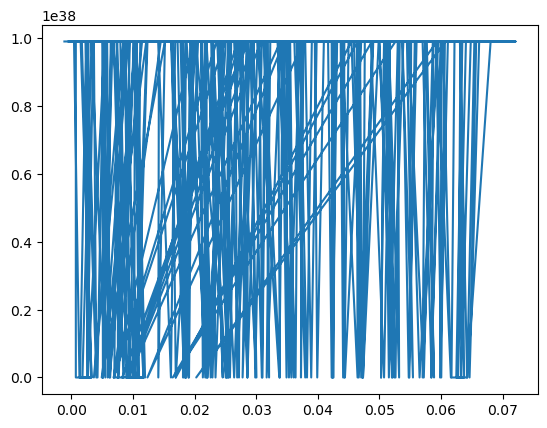

W2


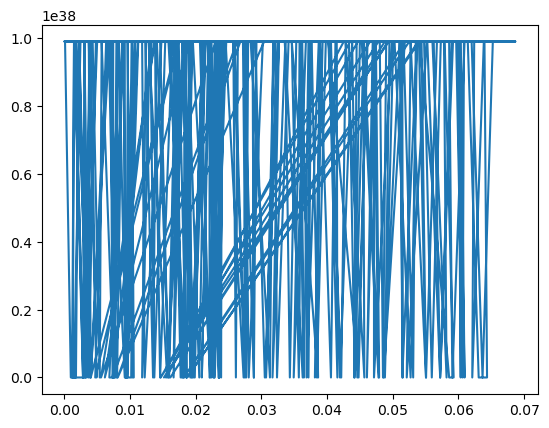

W3


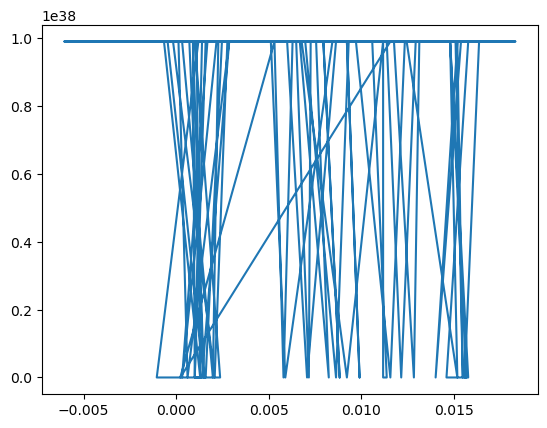

W4


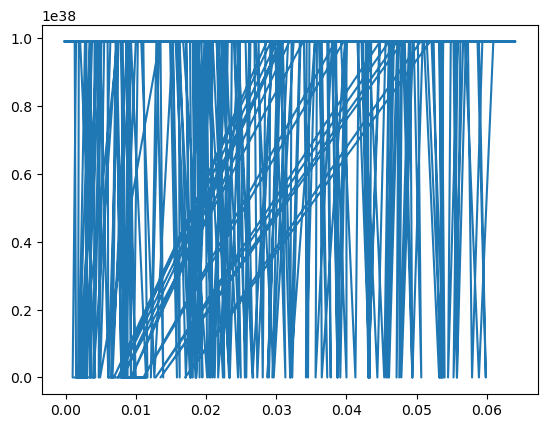

W5


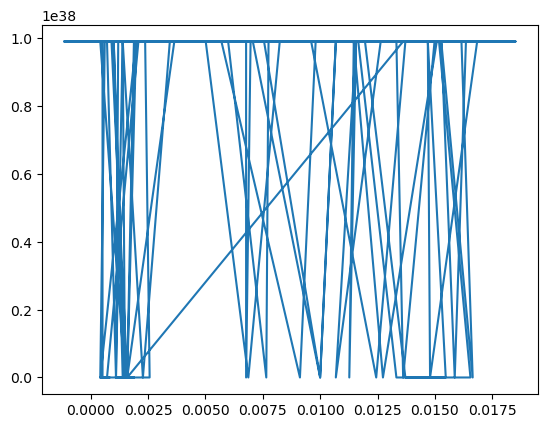

W6


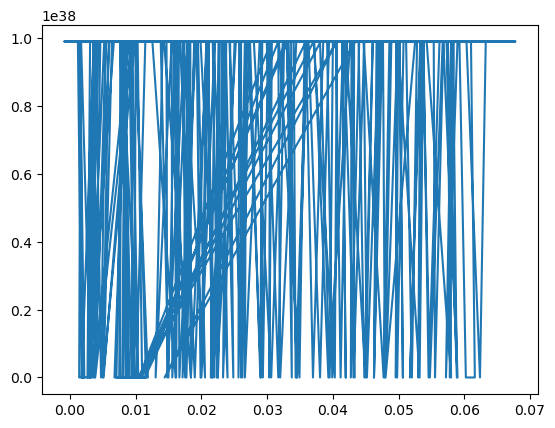

W7


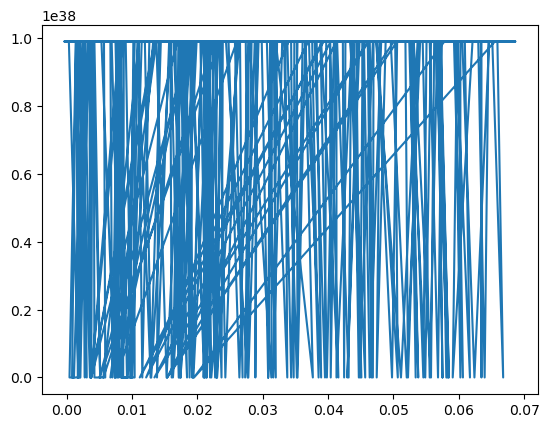

W8


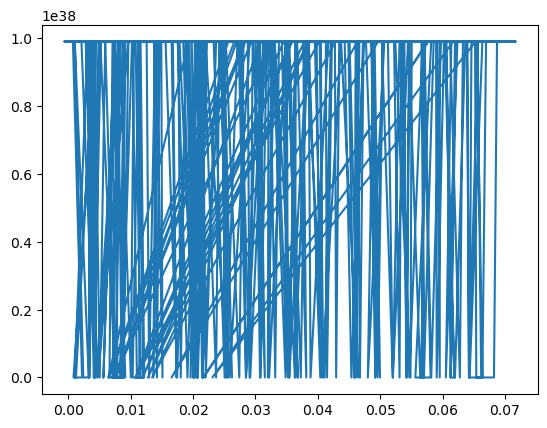

N1


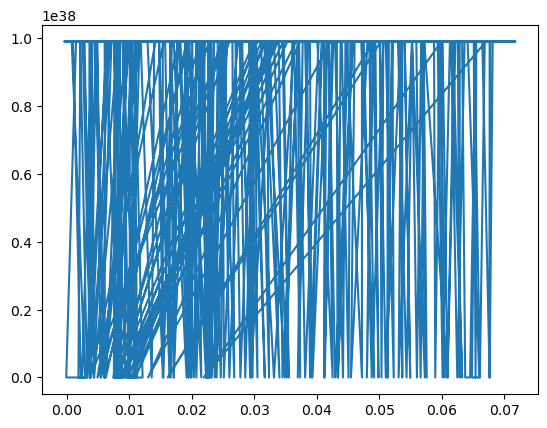

N2


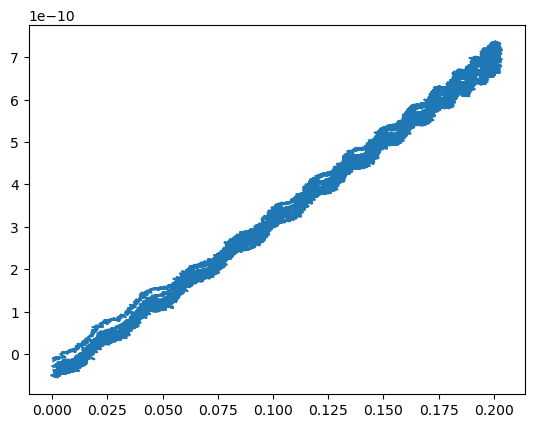

N3


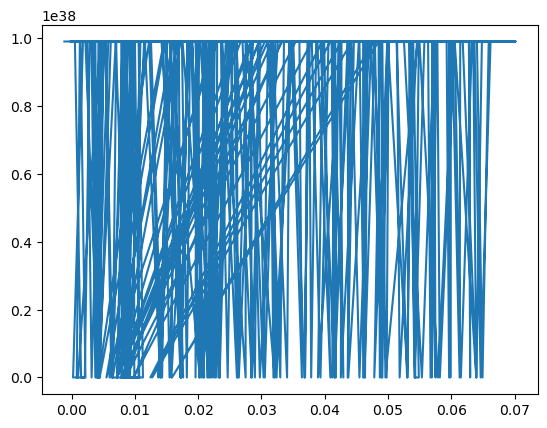

N4


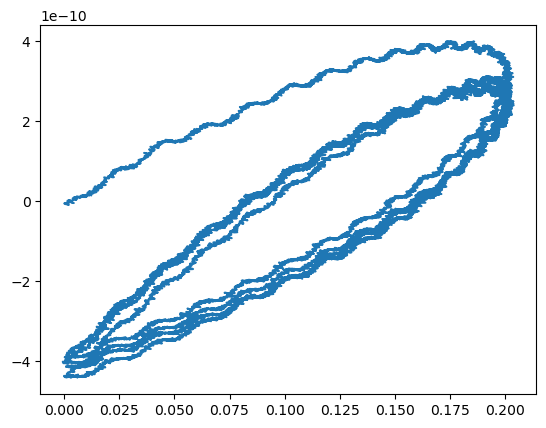

N5


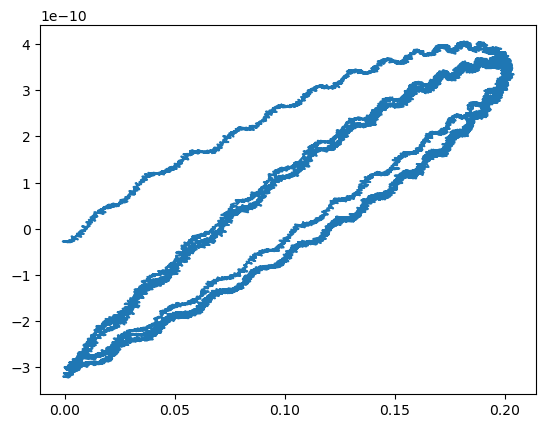

N6


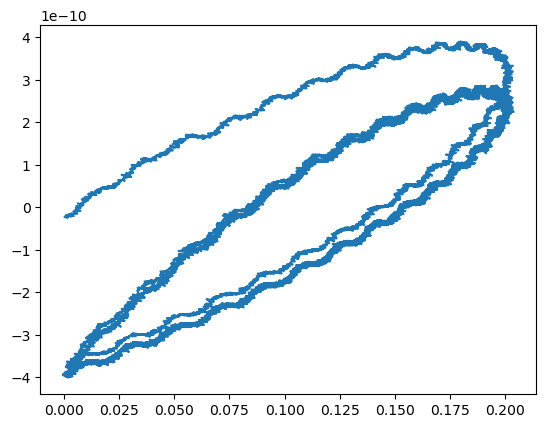

N7


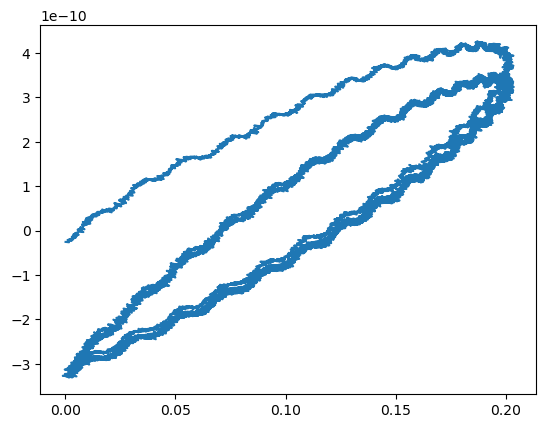

N8


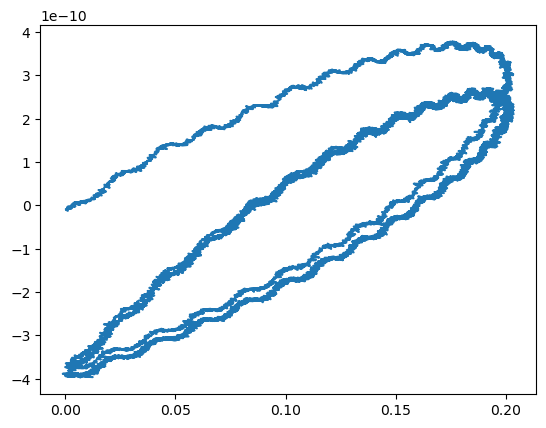

E1


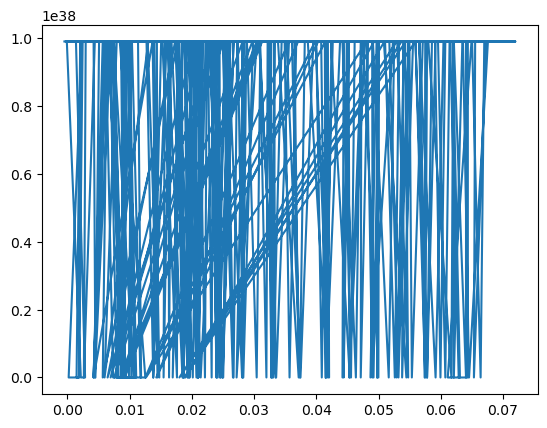

E2


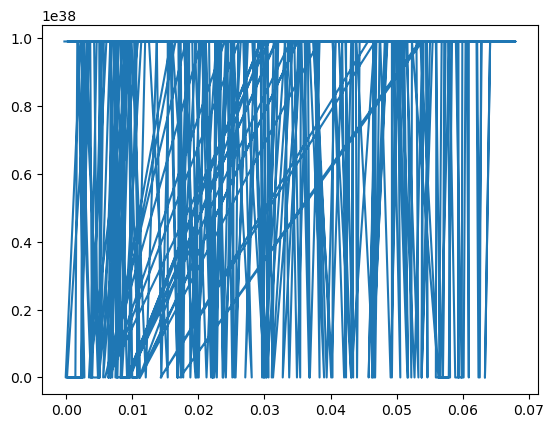

E3


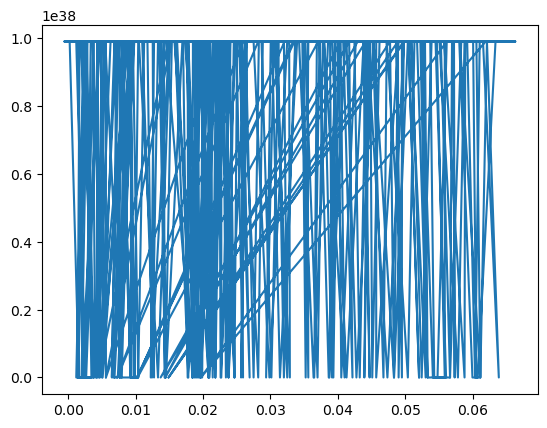

E4


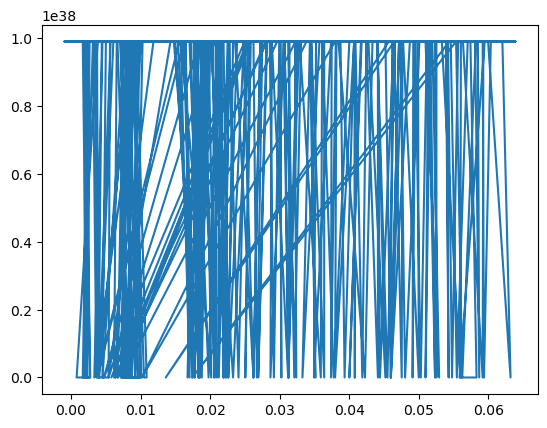

E5


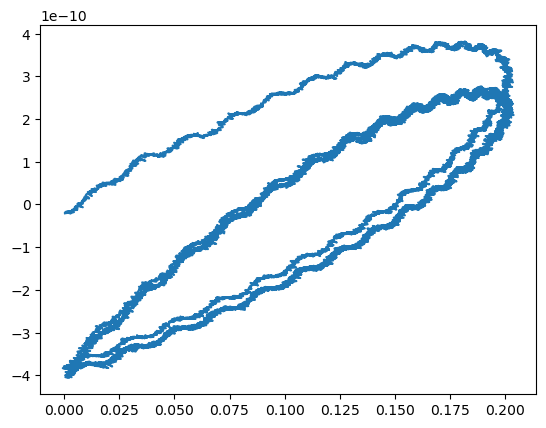

E6


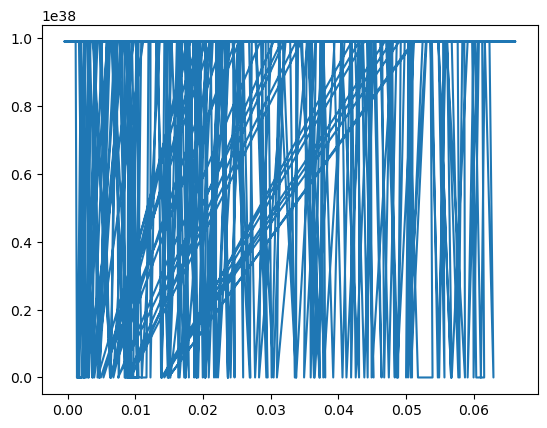

E7


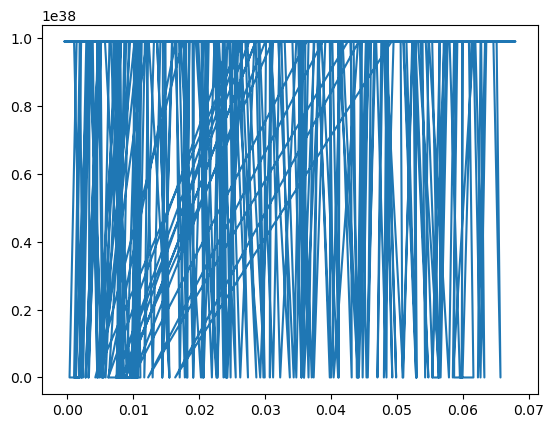

E8


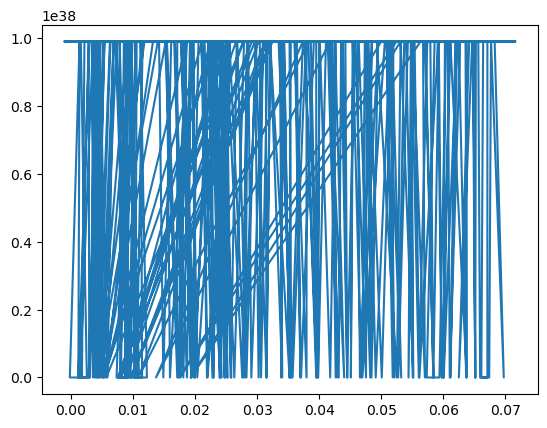

S1


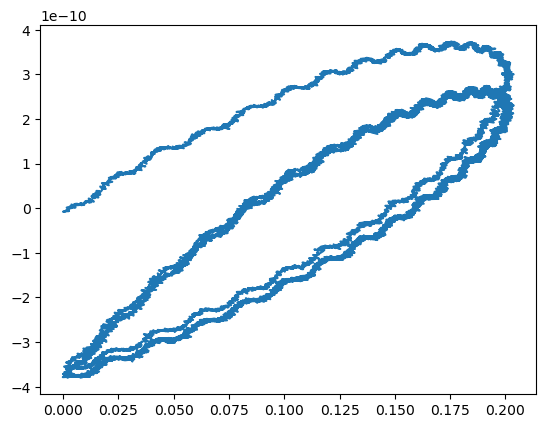

S2


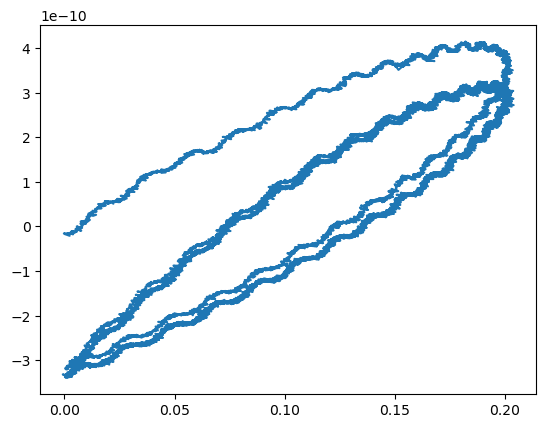

S3


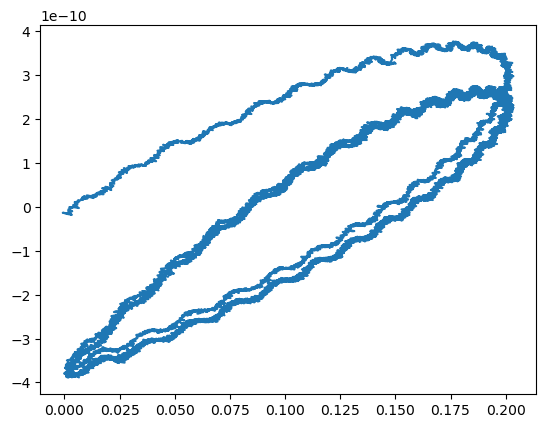

S4


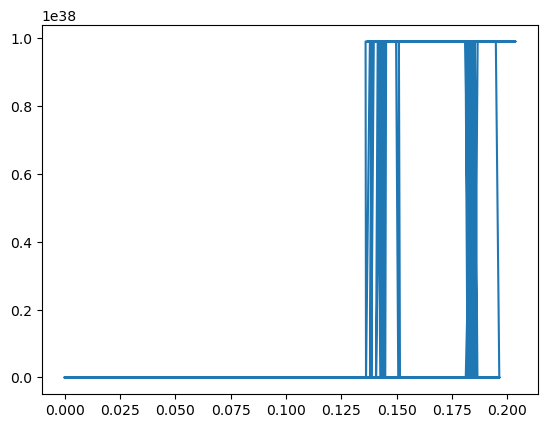

S5


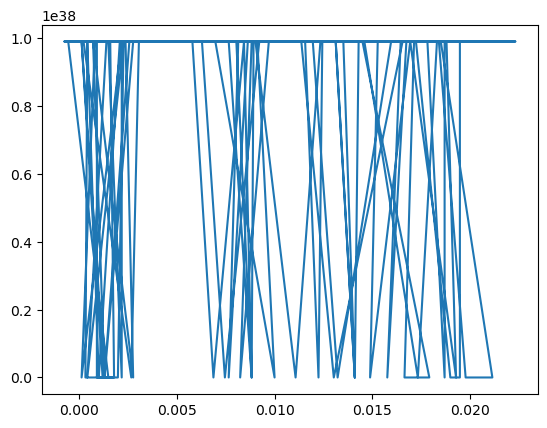

S6


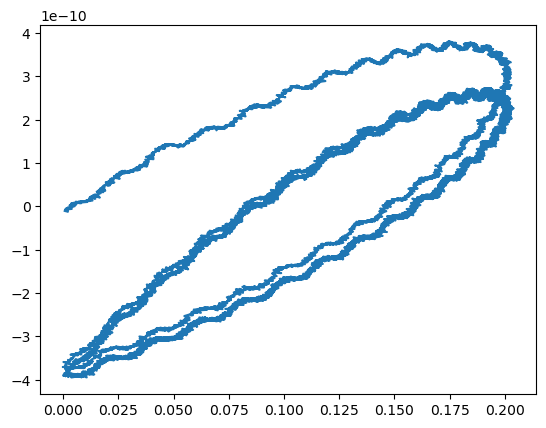

S7


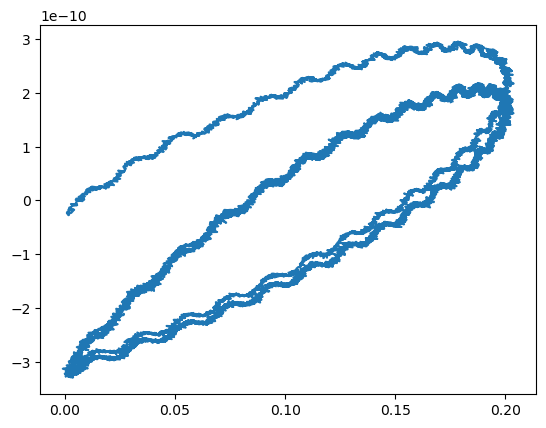

S8


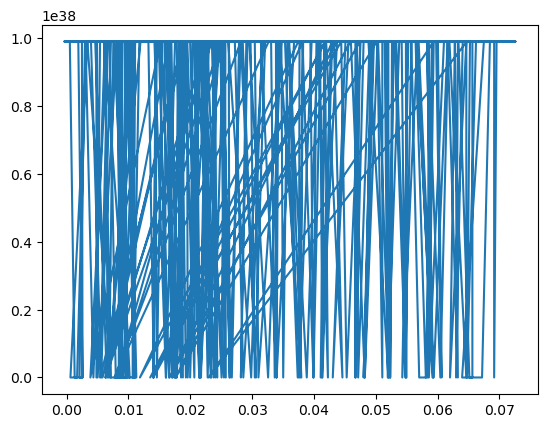

In [13]:
#########################################  Perform just the IV ##################################
stage ='Dry_L_2'
rtBias_mV = 50

if os.path.exists(f'C:/Data/Plater/{wafer}')==False:
    os.mkdir(f'C:/Data/Plater/{wafer}')
if os.path.exists(f'C:/Data/Plater/{wafer}/{chip}')==False:    
    os.mkdir(f'C:/Data/Plater/{wafer}/{chip}')

channel='N8'    
filename=f'C:/Data/Plater/{wafer}/{chip}/{channel}_{stage}'
if os.path.exists(filename + '.npy'):
    raise Exception('Wrong Path')    
    pass

 
plater.setBias(0)
plater.TopElectrode()

plater.setThreshold(current_nA = 200)
plater.disableThreshold()

for channel in plater.channels:
    print(channel)
    plater.setBias(0)
    plater.SelectChannel(channel)
    time.sleep(1)

    filename=f'C:/Data/Plater/{wafer}/{chip}/{channel}_{stage}'
    slope, outBias,currents =KeithleyIV()
    plater.setBias(0)


    with open(filename+ '_KIV.npy', 'wb') as f:
        np.save(f, slope)
        np.save(f, outBias)
        np.save(f, currents)

In [6]:

code ="""
reset()
loadscript
    
    
    numCycles=2
    frequency=1
    limitI=10e-10

	local COMPLETE = "{COMPLETE}"
	-- Generate the source values
	local Vpp				= 1.2
	local sourceValues		= {} 
	local pointsPerCycle	= 100 / frequency
	local numDataPoints		= pointsPerCycle * numCycles

	local res = {}
    for i = 1, numDataPoints do
        res[i] =math.abs( math.sin(i * 2 * math.pi / pointsPerCycle))
        sourceValues[i] = (Vpp * res[i])  
    end

	-- Configure the SMU ranges
	smua.reset()
	smua.source.settling		= smua.SETTLE_FAST_POLARITY
	smua.source.autorangev		= smua.AUTORANGE_OFF
	smua.source.autorangei		= smua.AUTORANGE_OFF
    smua.source.rangev			= math.abs( Vpp ) +.01
	smua.source.delay			= 0
	smua.source.limiti			= 1e-3

	smua.measure.autorangev		= smua.AUTORANGE_OFF
	smua.measure.autorangei		= smua.AUTORANGE_OFF
	smua.measure.autozero		= smua.AUTOZERO_OFF
	smua.measure.delay			= 0
	smua.measure.delayfactor    = 1
	smua.measure.analogfilter   = 0

	-- Voltage will be measured on the same range as the source range
	smua.measure.rangei			= limitI
	smua.measure.nplc			= .1

	-- Prepare the Reading Buffers
	smua.nvbuffer1.clear()
	smua.nvbuffer1.collecttimestamps	= 1
	smua.nvbuffer2.clear()
	smua.nvbuffer2.collecttimestamps	= 1

	-- Configure the trigger model
	--============================
	
	-- Timer 1 controls the time between source points
	trigger.timer[1].delay = (1 / 7200)
	trigger.timer[1].passthrough = true
	trigger.timer[1].stimulus = smua.trigger.ARMED_EVENT_ID
	trigger.timer[1].count = numDataPoints - 1

	-- Configure the SMU trigger model
	smua.trigger.source.listv(sourceValues)
	smua.trigger.source.limiti		= limitI
	smua.trigger.measure.action		= smua.ENABLE
	smua.trigger.measure.iv(smua.nvbuffer1, smua.nvbuffer2)
	smua.trigger.endpulse.action	= smua.SOURCE_HOLD
	smua.trigger.endsweep.action	= smua.SOURCE_IDLE
	smua.trigger.count				= numDataPoints
	smua.trigger.arm.stimulus		= 0
	smua.trigger.source.stimulus	= trigger.timer[1].EVENT_ID
	smua.trigger.measure.stimulus	= 0
	smua.trigger.endpulse.stimulus	= 0
	smua.trigger.source.action		= smua.ENABLE
	-- Ready to begin the test

	smua.source.output					= smua.OUTPUT_ON
	-- Start the trigger model execution
	smua.trigger.initiate()
	-- Wait until the sweep has completed
	waitcomplete()
	smua.source.output					= smua.OUTPUT_OFF

 
	printbuffer(1, smua.nvbuffer1.n, smua.nvbuffer1.readings)
	print('')
    printbuffer(1, smua.nvbuffer2.n, smua.nvbuffer2.readings)

	print('Done')
endscript
script.run()
""".split('\n')

keithley.query("print('h')")
def KeithleyIV():
    for line in code:
        keithley.write(line)

    time.sleep(60)
     
    text=keithley.read()
    while 'Done' not in text :
        text+=keithley.read() + "\n"

    text = text.split('\n') 
    current = np.array( [float(x) for x in text[0].split(',')[:-1]])
    volts  = np.array( [float(x) for x in text[1].split(',')[:-1]])
    plt.plot(volts,current)
    plt.show()
    slope=np.polyfit(volts,current,1)[0]
    
    return slope,volts,current*1e9

#########################################  Perform just the IV ##################################
stage ='Dry_L_3'
rtBias_mV = 50

if os.path.exists(f'C:/Data/Plater/{wafer}')==False:
    os.mkdir(f'C:/Data/Plater/{wafer}')
if os.path.exists(f'C:/Data/Plater/{wafer}/{chip}')==False:    
    os.mkdir(f'C:/Data/Plater/{wafer}/{chip}')

channel='N8'    
filename=f'C:/Data/Plater/{wafer}/{chip}/{channel}_{stage}'
if os.path.exists(filename + '.npy'):
    raise Exception('Wrong Path')    
    pass

 
plater.setBias(0)
plater.TopElectrode()

plater.setThreshold(current_nA = 200)
plater.disableThreshold()

for channel in plater.channels:
    print(channel)
    plater.setBias(0)
    plater.SelectChannel(channel)
    time.sleep(1)

    filename=f'C:/Data/Plater/{wafer}/{chip}/{channel}_{stage}'
    slope, outBias,currents =KeithleyIV()
    plater.setBias(0)


    with open(filename+ '_KIV.npy', 'wb') as f:
        np.save(f, slope)
        np.save(f, outBias)
        np.save(f, currents)

Thresh Current:200nA bias:4.0V
W1


KeyboardInterrupt: 

In [7]:
text=keithley.read()

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [ ]:

with Plater(10000) as plater:
        plater.setBias(0)
        plater.TopElectrode()
        
        plater.setThreshold(current_nA = 200)
        plater.disableThreshold()

        for channel in plater.channels:
            plater.setBias(0)
            plater.SelectChannel(channel)
            time.sleep(1)
            plater.TopElectrode()
            times,currents=plater.runRT(voltage_mV=100,time_s= 3)
            plt.plot(currents)
            
            plater.BottomElectrode()
            times,currents=plater.runRT(voltage_mV=100,time_s= 3)
            plt.plot(currents)
            
            plt.show()
            
            plater.TopElectrode()
            slope, outBias,currents =plater.runIV(maxVoltage=.25,slew_mV_s=1000, samplesPerPoint=200)
             
            
            plater.BottomElectrode()
            slope, outBias,currents =plater.runIV(maxVoltage=.25,slew_mV_s=1000, samplesPerPoint=200)
             
            
            
            
            break
            

In [ ]:
plater = Plater(10000)
plater.setBias(0)
plater.TopElectrode()
#plater.BottomElectrode()

plater.setThreshold(current_nA = 200)
plater.disableThreshold()

            
plater.setBias(1)
plater.SelectChannel('N1')

In [ ]:
plater.setBias(1)
plater.ResetDevice()
plater.SelectChannel('E8')

In [ ]:
N1->W8
N8->W1
W8->N1
W1->N8


